In [2]:
!pip install yfinance


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
# import SPY ETF data from 1 Jan 2024 - 30 Nov 2025

start_date = "2024-01-01"
end_date = "2025-11-30"
ticker = "SPY"

SPY = yf.download(ticker, start_date, end_date, auto_adjust = False)
SPY.tail(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2025-11-21,659.030029,659.030029,664.549988,650.849976,655.049988,123956200
2025-11-24,668.729980,668.729980,670.059998,661.590027,662.690002,80437900
2025-11-25,675.020020,675.020020,676.210022,664.479980,668.630005,81077100
2025-11-26,679.679993,679.679993,681.700012,676.719971,677.630005,71879600
2025-11-28,683.390015,683.390015,683.669983,680.500000,680.859985,49212000


In [4]:
# simple daily returns

SPY["Daily Return"] = SPY["Adj Close"].pct_change()

SPY.head()

Price,Adj Close,Close,High,Low,Open,Volume,Daily Return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,,
2024-01-02,462.610413,472.649994,473.670013,470.489990,472.160004,123623700,NaN
2024-01-03,458.832336,468.790009,471.190002,468.170013,470.429993,103585900,-0.008167
2024-01-04,457.354431,467.279999,470.959991,467.049988,468.299988,84232200,-0.003221
2024-01-05,457.980896,467.920013,470.440002,466.429993,467.489990,86118900,0.001370
2024-01-08,464.518951,474.600006,474.750000,468.299988,468.429993,74879100,0.014276


In [5]:
# compute 95% empirical (non-parametric) range

lower_bound = SPY["Daily Return"].quantile(0.025)
upper_bound = SPY["Daily Return"].quantile(0.975)

print(lower_bound, upper_bound)

-0.019629915420048497 0.0171753117232847


95% of observed SPY daily returns fall between -1.96% and 1.71%

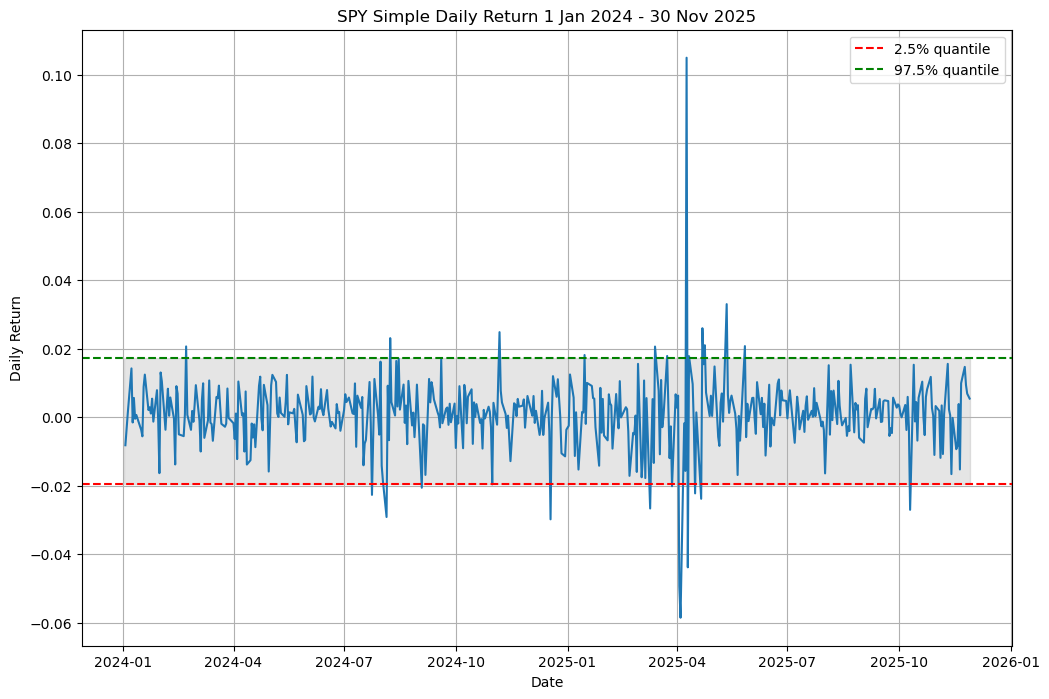

In [6]:
# chart of simple daily returns

plt.figure(figsize = (12, 8))
plt.plot(SPY.index, SPY["Daily Return"])
plt.axhline(lower_bound, color = "red", linestyle = "--", label = "2.5% quantile")
plt.axhline(upper_bound, color = "green", linestyle = '--', label = "97.5% quantile")
plt.fill_between(SPY.index, lower_bound, upper_bound, color = "gray", alpha = 0.2)

plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.title("SPY Simple Daily Return 1 Jan 2024 - 30 Nov 2025")

plt.grid(True)
plt.show()

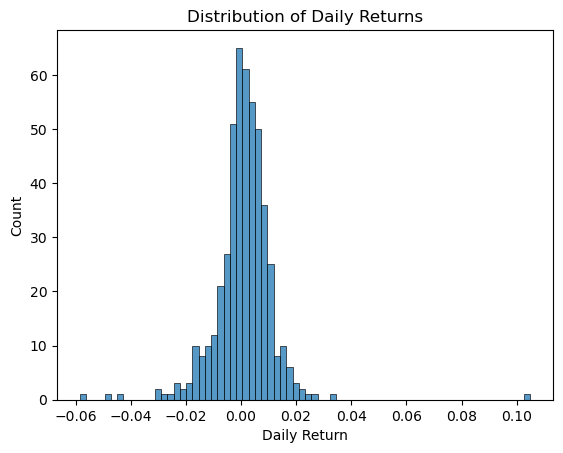

In [7]:
# show how returns are distributed using a histogram

sns.histplot(SPY["Daily Return"])
plt.title("Distribution of Daily Returns")

plt.show()